In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
plt.rcParams['savefig.dpi'] = 150
plt.style.use('ggplot')

import seaborn as sns
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("husl", 8));
sns.mpl.rc("figure", figsize=(8,5))
sns.set_style('whitegrid')

In [2]:
cd ../

C:\Users\Talha\Documents\WinPython3\projects\News-Sharing-by-Sentiment


In [3]:
#read the data -> pn: published news, tn: tweeted news
pn = pd.read_csv('data/pb-sp.csv',encoding='utf-8')
tn = pd.read_csv('data/tw-sp.csv',encoding='utf-8')
outlets = sorted(pn['outlet'].unique().tolist())
pn['sp'] = pn['posemo']-pn['negemo']
tn['sp'] = tn['posemo']-tn['negemo']
tn['sp_t'] = tn['posemo_t']-tn['negemo_t']

In [4]:
#news tweeted multiple types are grouped into two
df4 = tn.groupby('href').filter(lambda g: len(g)>3) #news tweeted at least four times
more_rt = df4.groupby('href').apply(lambda g: g.sort('rt')[['rt','sp_t']].iloc[1:]) # all the tweet excluding the least RTed
less_rt = df4.groupby('href').apply(lambda g: g.sort('rt')[['rt','sp_t']].iloc[0]) #least retweeted tweets
print(more_rt.sp_t.mean(),less_rt.sp_t.mean())

-0.335782241015 -0.08625


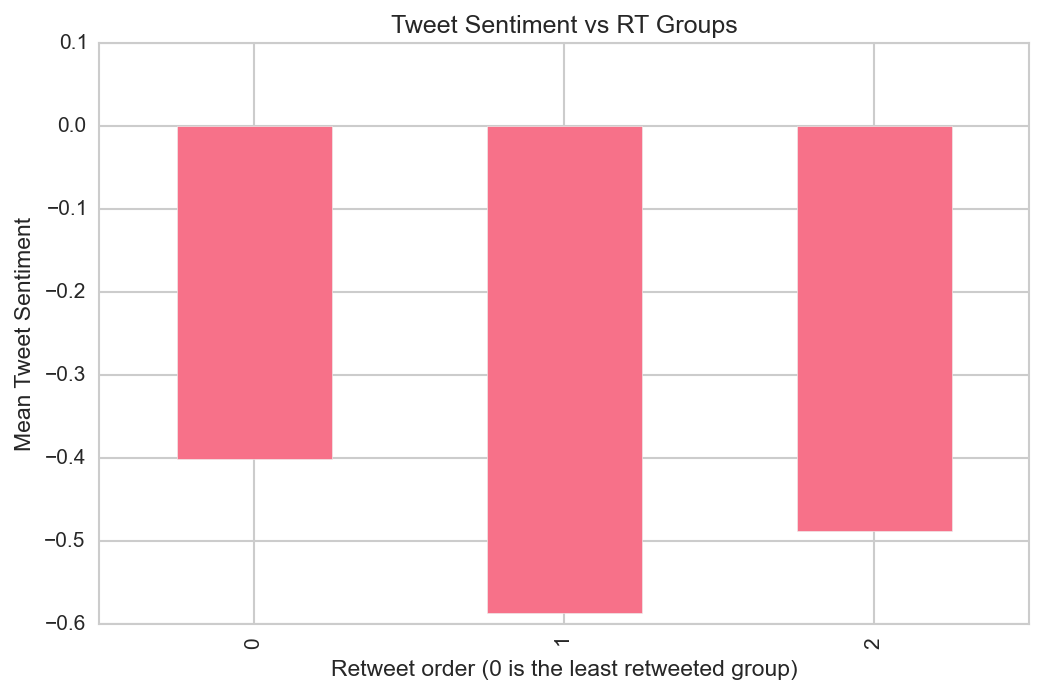

In [5]:
df = tn.groupby('href').filter(lambda g: len(g)==3) #news tweeted exactly three times
grouped = df.groupby('href').apply(lambda g: g.sort('rt').reset_index())[['rt','sp_t','cat']]
unstacked = grouped.unstack()
ax = unstacked.sp_t.mean()[:4].plot(kind='bar')
ax.set(xlabel='Retweet order (0 is the least retweeted group)',ylabel='Mean Tweet Sentiment',title='Tweet Sentiment vs RT Groups');

In [6]:
#Sample size for each group
#pd.DataFrame([unstacked.sp_t[[i]].dropna().shape[0] for i in range(unstacked.sp_t.columns.shape[0])],columns=['N'])
unstacked

rt  \
                                                                                                                                                                                          0   
href                                                                                                                                                                                          
http://abcnews.go.com/Business/cup-inventor-john-sylvan-admits-expensive-coffee-pods/story?id=29382481                                                                                94.00   
http://abcnews.go.com/Business/embattled-sony-pictures-executive-amy-pascal-steps/story?id=28749965                                                                                   33.00   
http://abcnews.go.com/Business/kraft-krft-heinz-agree-merge/story?id=29889951                                                                                                        123.00   
http://abcnews.go.com/Business/make-104-acre-florida-island-dream-home/story?id=29732824                                                                                             168.00   
http://abcnews.go.com/Entertainment/bobbi-kristina-brown-alive-found-unresponsive/story?id=28628653                                                                                  294.00   
http://abcnews.go.com/Entertainment/duchess-kate-appeals-greater-care-childrens-mental-health/story?id=28988190                                                                      210.00   
http://abcnews.go.com/Entertainment/harrison-ford-injured-california-small-plane-crash/story?id=29425681                                                                             186.00   
http://abcnews.go.com/Entertainment/jon-stewart-leaving-comedy-central/story?id=28875084                                                                                             118.00   
http://abcnews.go.com/Entertainment/kevin-costner-god-miracle-bobbi-kristina-brown/story?id=28867469                                                                                 133.00   
http://abcnews.go.com/Entertainment/meet-elena-avalor-disneys-latina-princess/story?id=28581447                                                                                      292.00   
http://abcnews.go.com/Entertainment/new-york-times-media-columnist-david-carr-dies-58/story?id=28936813                                                                               92.00   
http://abcnews.go.com/Entertainment/oscars-2015-live-updates-red-carpet/story?id=29075436                                                                                            144.00   
http://abcnews.go.com/Entertainment/star-trek-star-leonard-nimoy-dies-83/story?id=29274628                                                                                           732.00   
http://abcnews.go.com/Entertainment/vanilla-ice-arrested-burglary-florida-police/story?id=29058510                                                                                    71.00   
http://abcnews.go.com/Health/autism-speaks-urges-parents-vaccinate-children/story?id=28751485                                                                                        428.00   
http://abcnews.go.com/Health/blind-golden-retriever-smiley-warms-hearts-therapy-dog/story?id=29533746                                                                                311.00   
http://abcnews.go.com/Health/breakdown-ingredients-childhood-vaccines/story?id=28859870                                                                                               68.00   
http://abcnews.go.com/Health/dads-heartfelt-plea-congress-year-leukemia-exposed-measles/story?id=28866376                                                                            189.00   
http://abcnews.go.com/Health/dangerous-bacteria-mysteriously-escapes-louisiana-monkey-lab/story?id=29327907                                                                   

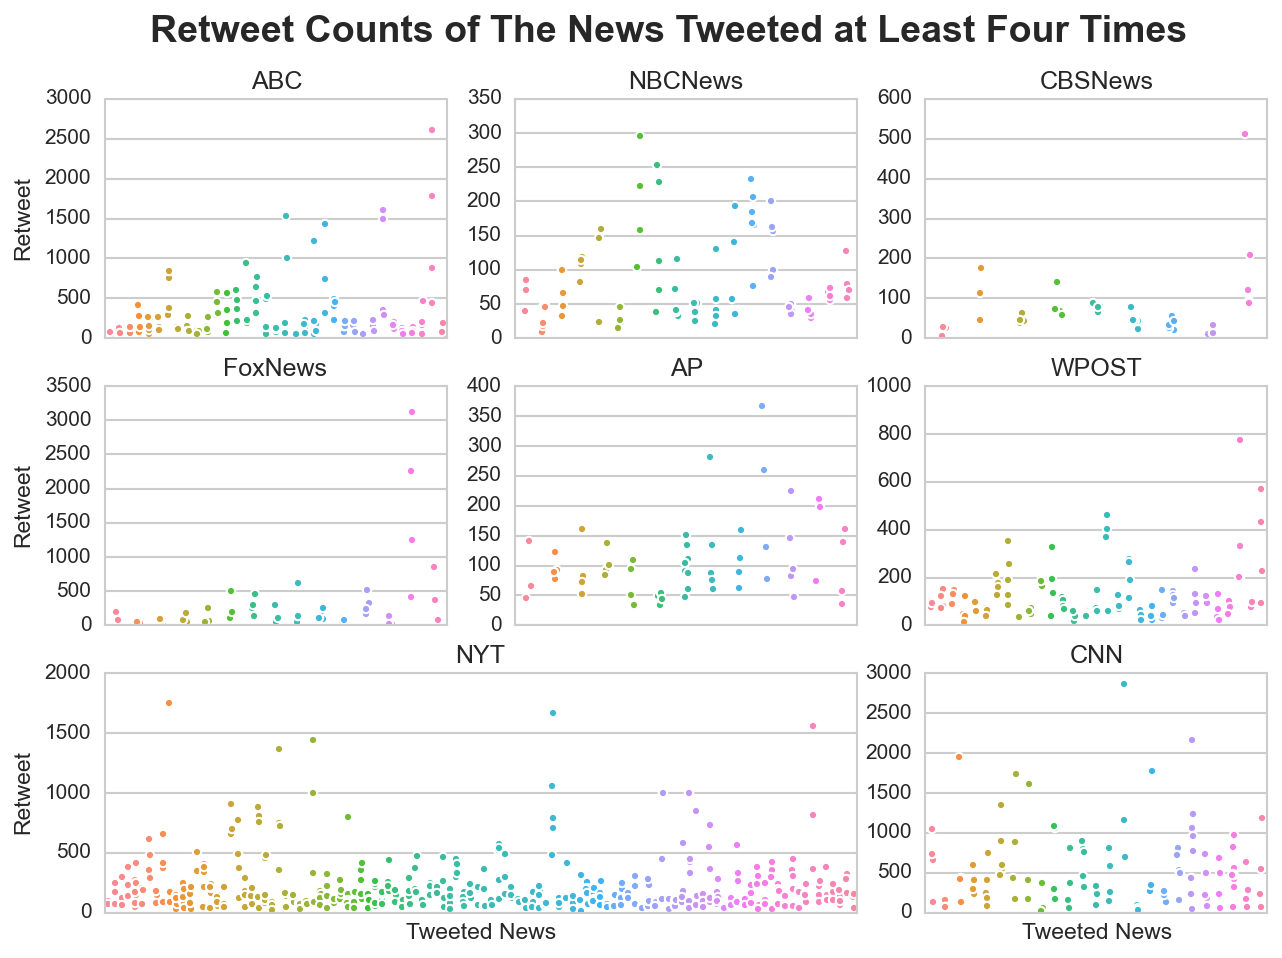

In [4]:
df4 = tn.groupby('href').filter(lambda g: len(g)>3)
gs = gridspec.GridSpec(3, 3)
axs = [plt.subplot(s) for s in (gs[0,0],gs[0,1],gs[0,2],gs[1,0],gs[1,1],gs[1,2],gs[2,:2],gs[2,2])]
for i,o in enumerate(df4.outlet.unique()):
    axs[i].set_title(o)
    if o == 'CNN' or o =='ABC': axs[i].set_ylim([0,3000])
    if o == 'NYT': axs[i].set_ylim([0,2000])
    if o == 'WPOST': axs[i].set_ylim([0,1000])
    g = sns.stripplot(x="href", y="rt",data=df4[df4.outlet==o],ax=axs[i],jitter=True,size=4)
    ylabel = 'Retweet' if i%3 == 0 else ''
    xlabel = 'Tweeted News' if i>=6 else ''
    axs[i].set(xlabel=xlabel,ylabel=ylabel,ylim=0,xticks=[])

f = plt.gcf()
f.set_size_inches(10, 7, forward=True)
f.suptitle('Retweet Counts of The News Tweeted at Least Four Times',fontsize=18, fontweight='bold')
f.savefig('figs/rt-news-stripplot.png', bbox_inches='tight')

In [5]:
#retweet stats
tw = pd.read_csv('data/LIWC/LIWC2015 Results (tweet-texts).csv',encoding='utf-8')
nan = tw[tw.url.isnull()]
url = tw[~tw.url.isnull()] 
pd.DataFrame({'no url':nan.rt.describe(),'any url':url.rt.describe(),'news url':tn.rt.describe()})

,any url,news url,no url
count,23255.00,16909.00,2344.00
mean,135.47,134.34,206.62
std,355.89,259.36,759.46
min,0.00,1.00,0.00
25%,43.00,45.00,44.00
50%,72.00,74.00,94.00
75%,133.00,134.00,207.00
max,36985.00,11031.00,31123.00


In [4]:
# Retweeted News (NOTE: THIS TAKES ~ 3min 32s)
rn = pd.concat([pd.DataFrame([row[1]]*int(1 + row[1].rt/50)) for row in tn.iterrows()])

In [6]:
#sentiment polarity stats
pd.DataFrame({'Published':pn.sp.describe(),'Tweeted':tn.sp.describe(),'Retweeted':rn.sp.describe()})

,Published,Retweeted,Tweeted
count,35930.000000,53792.000000,16909.000000
mean,0.514790,0.201119,0.124686
std,1.793846,1.977284,1.914987
min,-10.730000,-8.650000,-8.650000
25%,-0.510000,-0.990000,-1.050000
50%,0.550000,0.180000,0.090000
75%,1.630000,1.360000,1.260000
max,11.320000,14.700000,14.700000


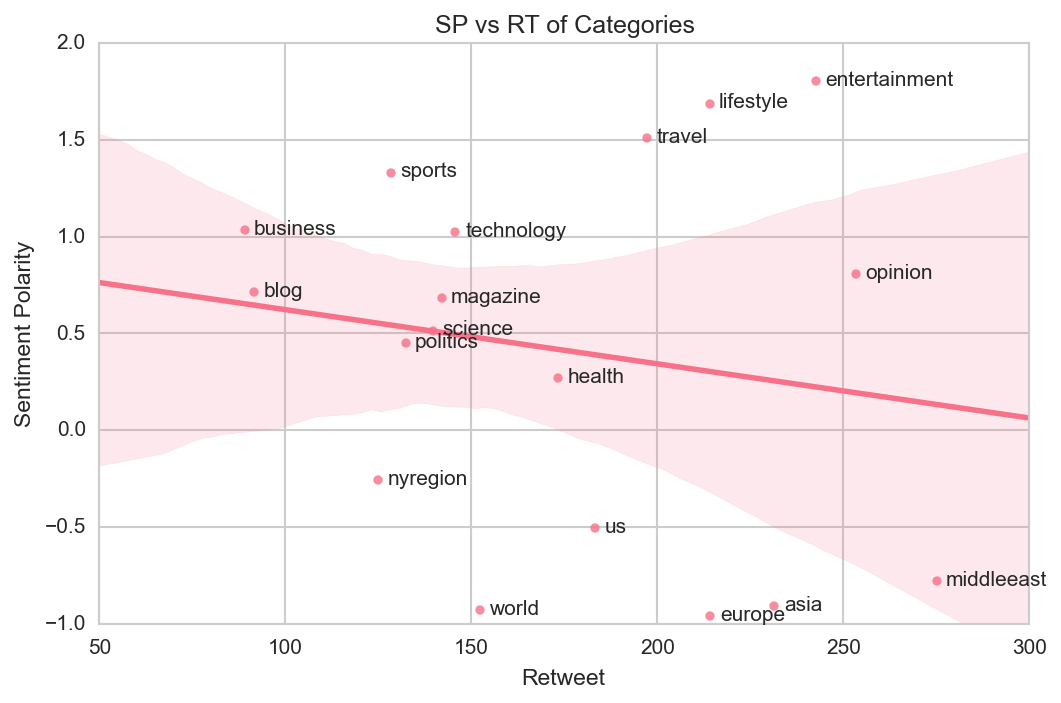

In [7]:
# we can filter the categories by increasing the number of news required per category
filtr = 100
df = tn.groupby('cat').filter(lambda x: (len(x) > filtr) & (x.name not in 'news article storyline bigstory'.split()))
df = pd.pivot_table(df,values=['sp','rt'],index=['cat'])
ax= sns.regplot('rt','sp',df)
#ax.set_ylim(-1,2)
ax.set(xlabel='Retweet', ylabel='Sentiment Polarity', title='SP vs RT of Categories',ylim=(-1,2))
df.apply(lambda r: ax.annotate(r.name, r.values,xytext=(5,-2), textcoords='offset points'), axis=1);
plt.gcf().savefig('figs/cat-rt-sp-scatter.png')

In [8]:
#mean, median, max of retweets per outlet
pd.pivot_table(tn,index=['outlet'],values=['rt'],aggfunc=[np.mean,np.median,max]).rename(columns={'rt':'Retweet'})

,mean,median,max
,Retweet,Retweet,Retweet
outlet,,,
ABC,184.100213,110.5,6994
AP,89.745522,70.0,862
CBSNews,72.585079,48.0,2458
CNN,396.500725,248.0,7752
FoxNews,134.664111,89.0,3122
NBCNews,85.786790,55.0,11031
NYT,139.529051,84.0,8917
WPOST,83.048544,59.0,3683


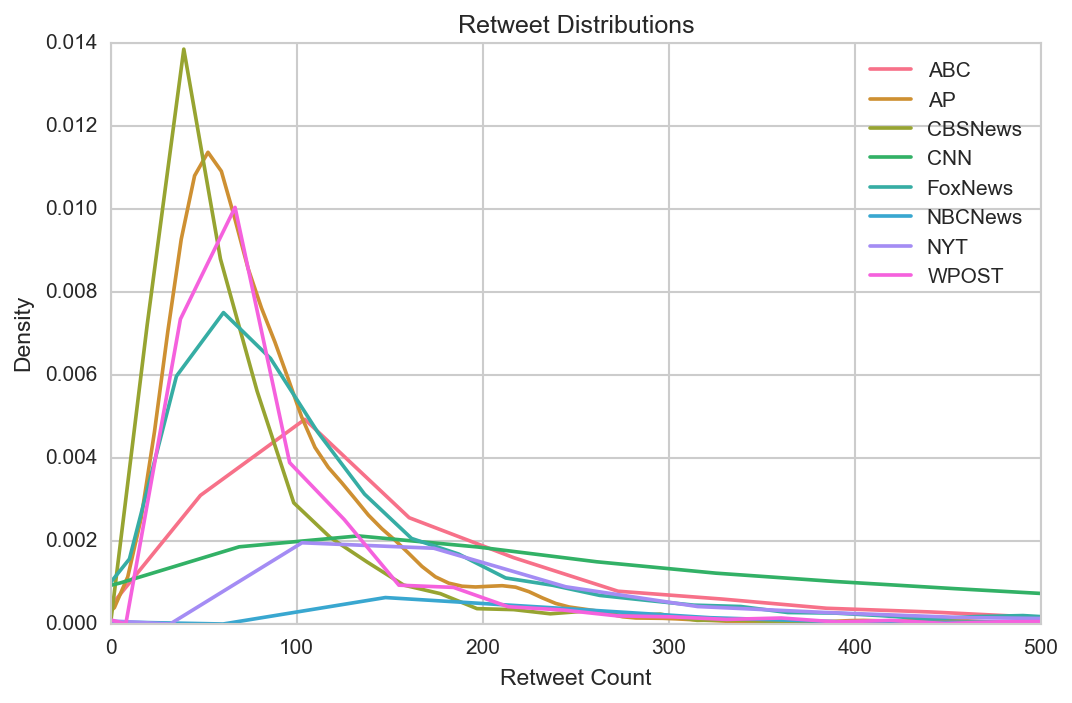

In [9]:
# density plot of retweets
ax = [sns.kdeplot(tn[tn.outlet==o].rt,label=o) for o in outlets][0]
ax.set(xlim=(0,500),title='Retweet Distributions',xlabel='Retweet Count',ylabel='Density');

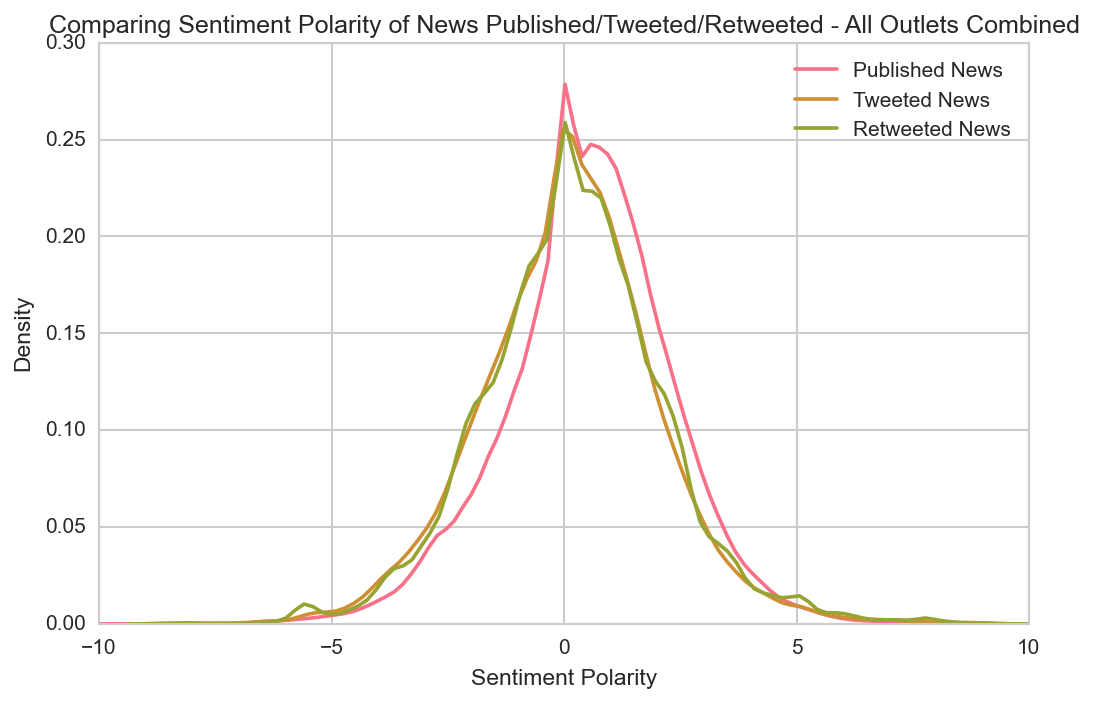

In [10]:
# sentiment polarities [posemo - negemo] of news 
c = 'sp'
sns.kdeplot(pn[c],label='Published News')
sns.kdeplot(tn[c],label='Tweeted News')
ax = sns.kdeplot(rn[c],label='Retweeted News')
ax.set_title('Comparing Sentiment Polarity of News Published/Tweeted/Retweeted - All Outlets Combined')
ax.set(xlim=(-10,10),xlabel='Sentiment Polarity',ylabel='Density')
plt.savefig('figs/sentiment-comparison-published-tweeted-retweeted.png',bbox_inches='tight')

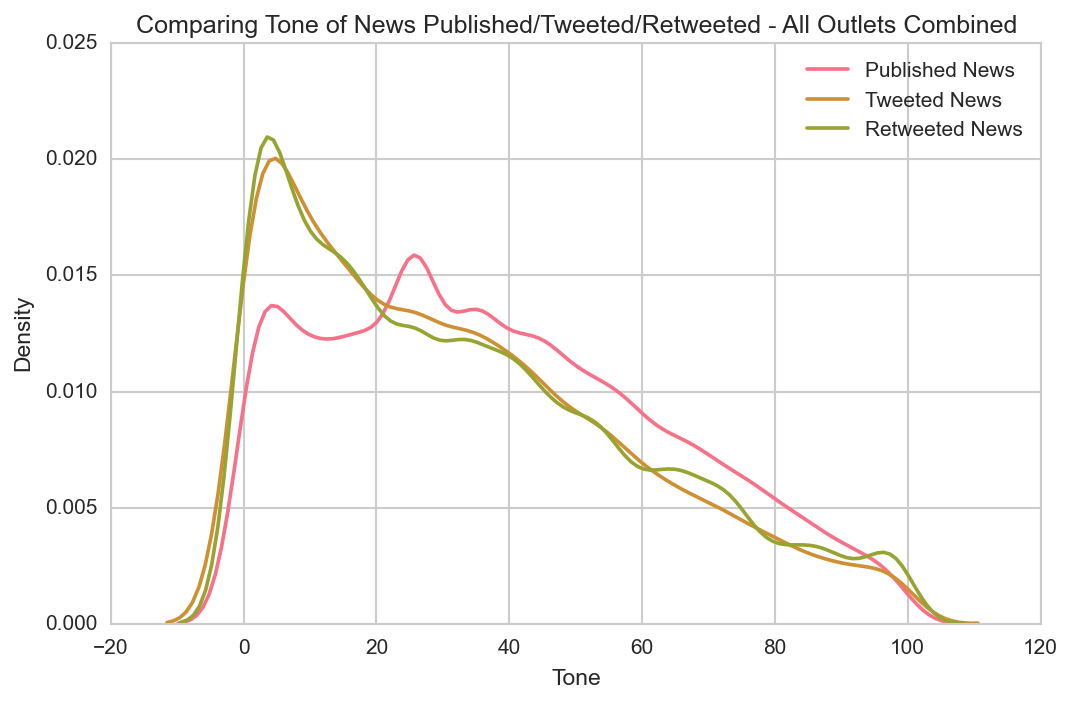

In [11]:
sns.kdeplot(pn['Tone'],label='Published News')#.set(xlim=splim)
sns.kdeplot(tn['Tone'],label='Tweeted News')#.set(xlim=splim)
ax = sns.kdeplot(rn['Tone'],label='Retweeted News')
ax.set_title('Comparing Tone of News Published/Tweeted/Retweeted - All Outlets Combined')
ax.set_xlabel('Tone')
ax.set_ylabel('Density')
plt.savefig('figs/tone-comparison-published-tweeted-retweeted.png',bbox_inches='tight')

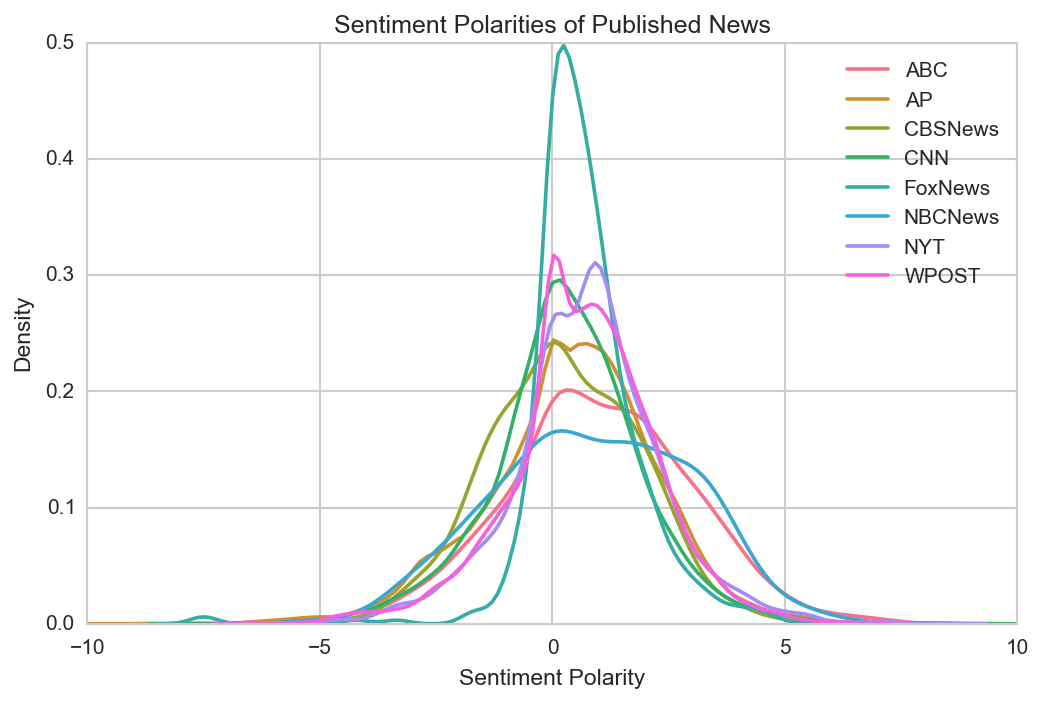

In [12]:
df = pn
ax = [sns.kdeplot(df[df['outlet']==o]['sp'],label=o) for o in outlets][0]
ax.set(xlim=(-10,10)) # = sns.kdeplot(df['sp'],label='Avg',color='black')
ax.set_title('Sentiment Polarities of Published News')
ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Density')
plt.savefig('figs/sentiment-published.png',bbox_inches='tight')

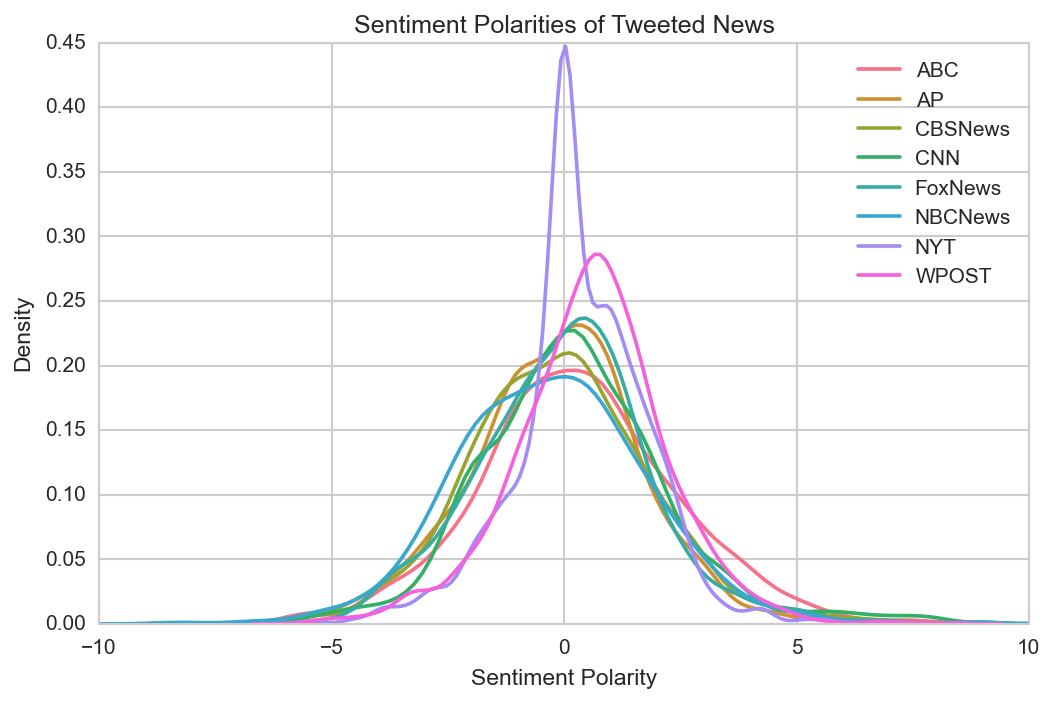

In [13]:
df = tn
ax = [sns.kdeplot(df[df['outlet']==o]['sp'],label=o) for o in outlets][0]
ax.set(xlim=(-10,10)) # = sns.kdeplot(df['sp'],label='Avg',color='black')
ax.set_title('Sentiment Polarities of Tweeted News')
ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Density')
plt.savefig('figs/sentiment-tweeted.png',bbox_inches='tight')

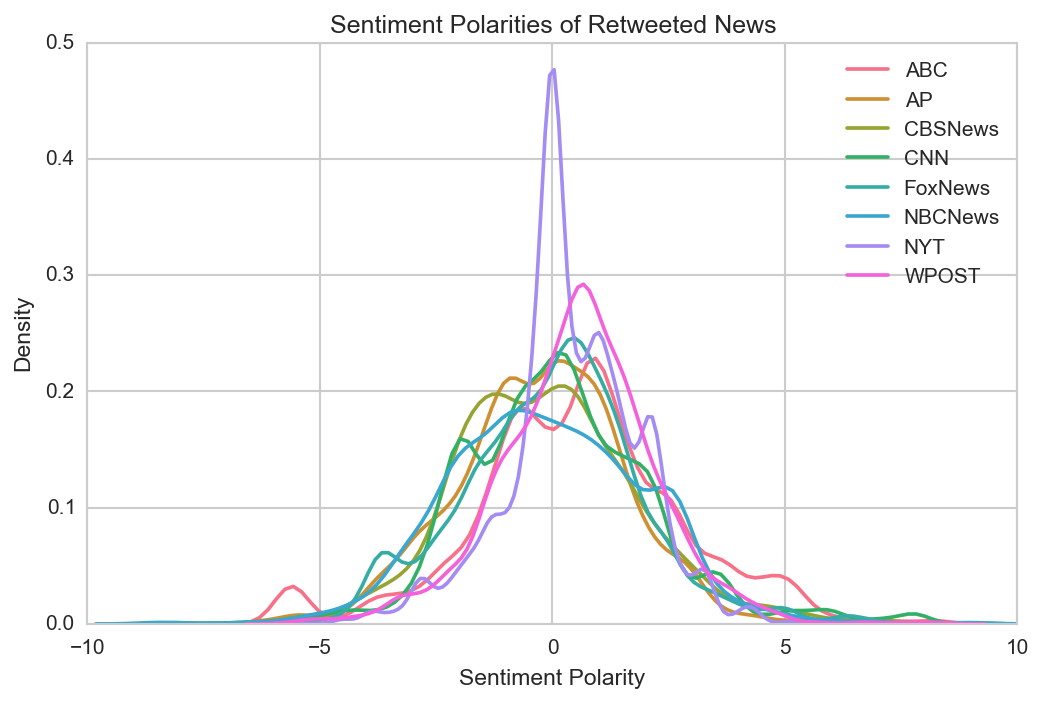

In [14]:
df = rn
ax = [sns.kdeplot(df[df['outlet']==o]['sp'],label=o) for o in outlets][0]
ax.set(xlim=(-10,10)) # = sns.kdeplot(df['sp'],label='Avg',color='black')
ax.set_title('Sentiment Polarities of Retweeted News')
ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Density')
plt.savefig('figs/sentiment-retweeted.png',bbox_inches='tight')

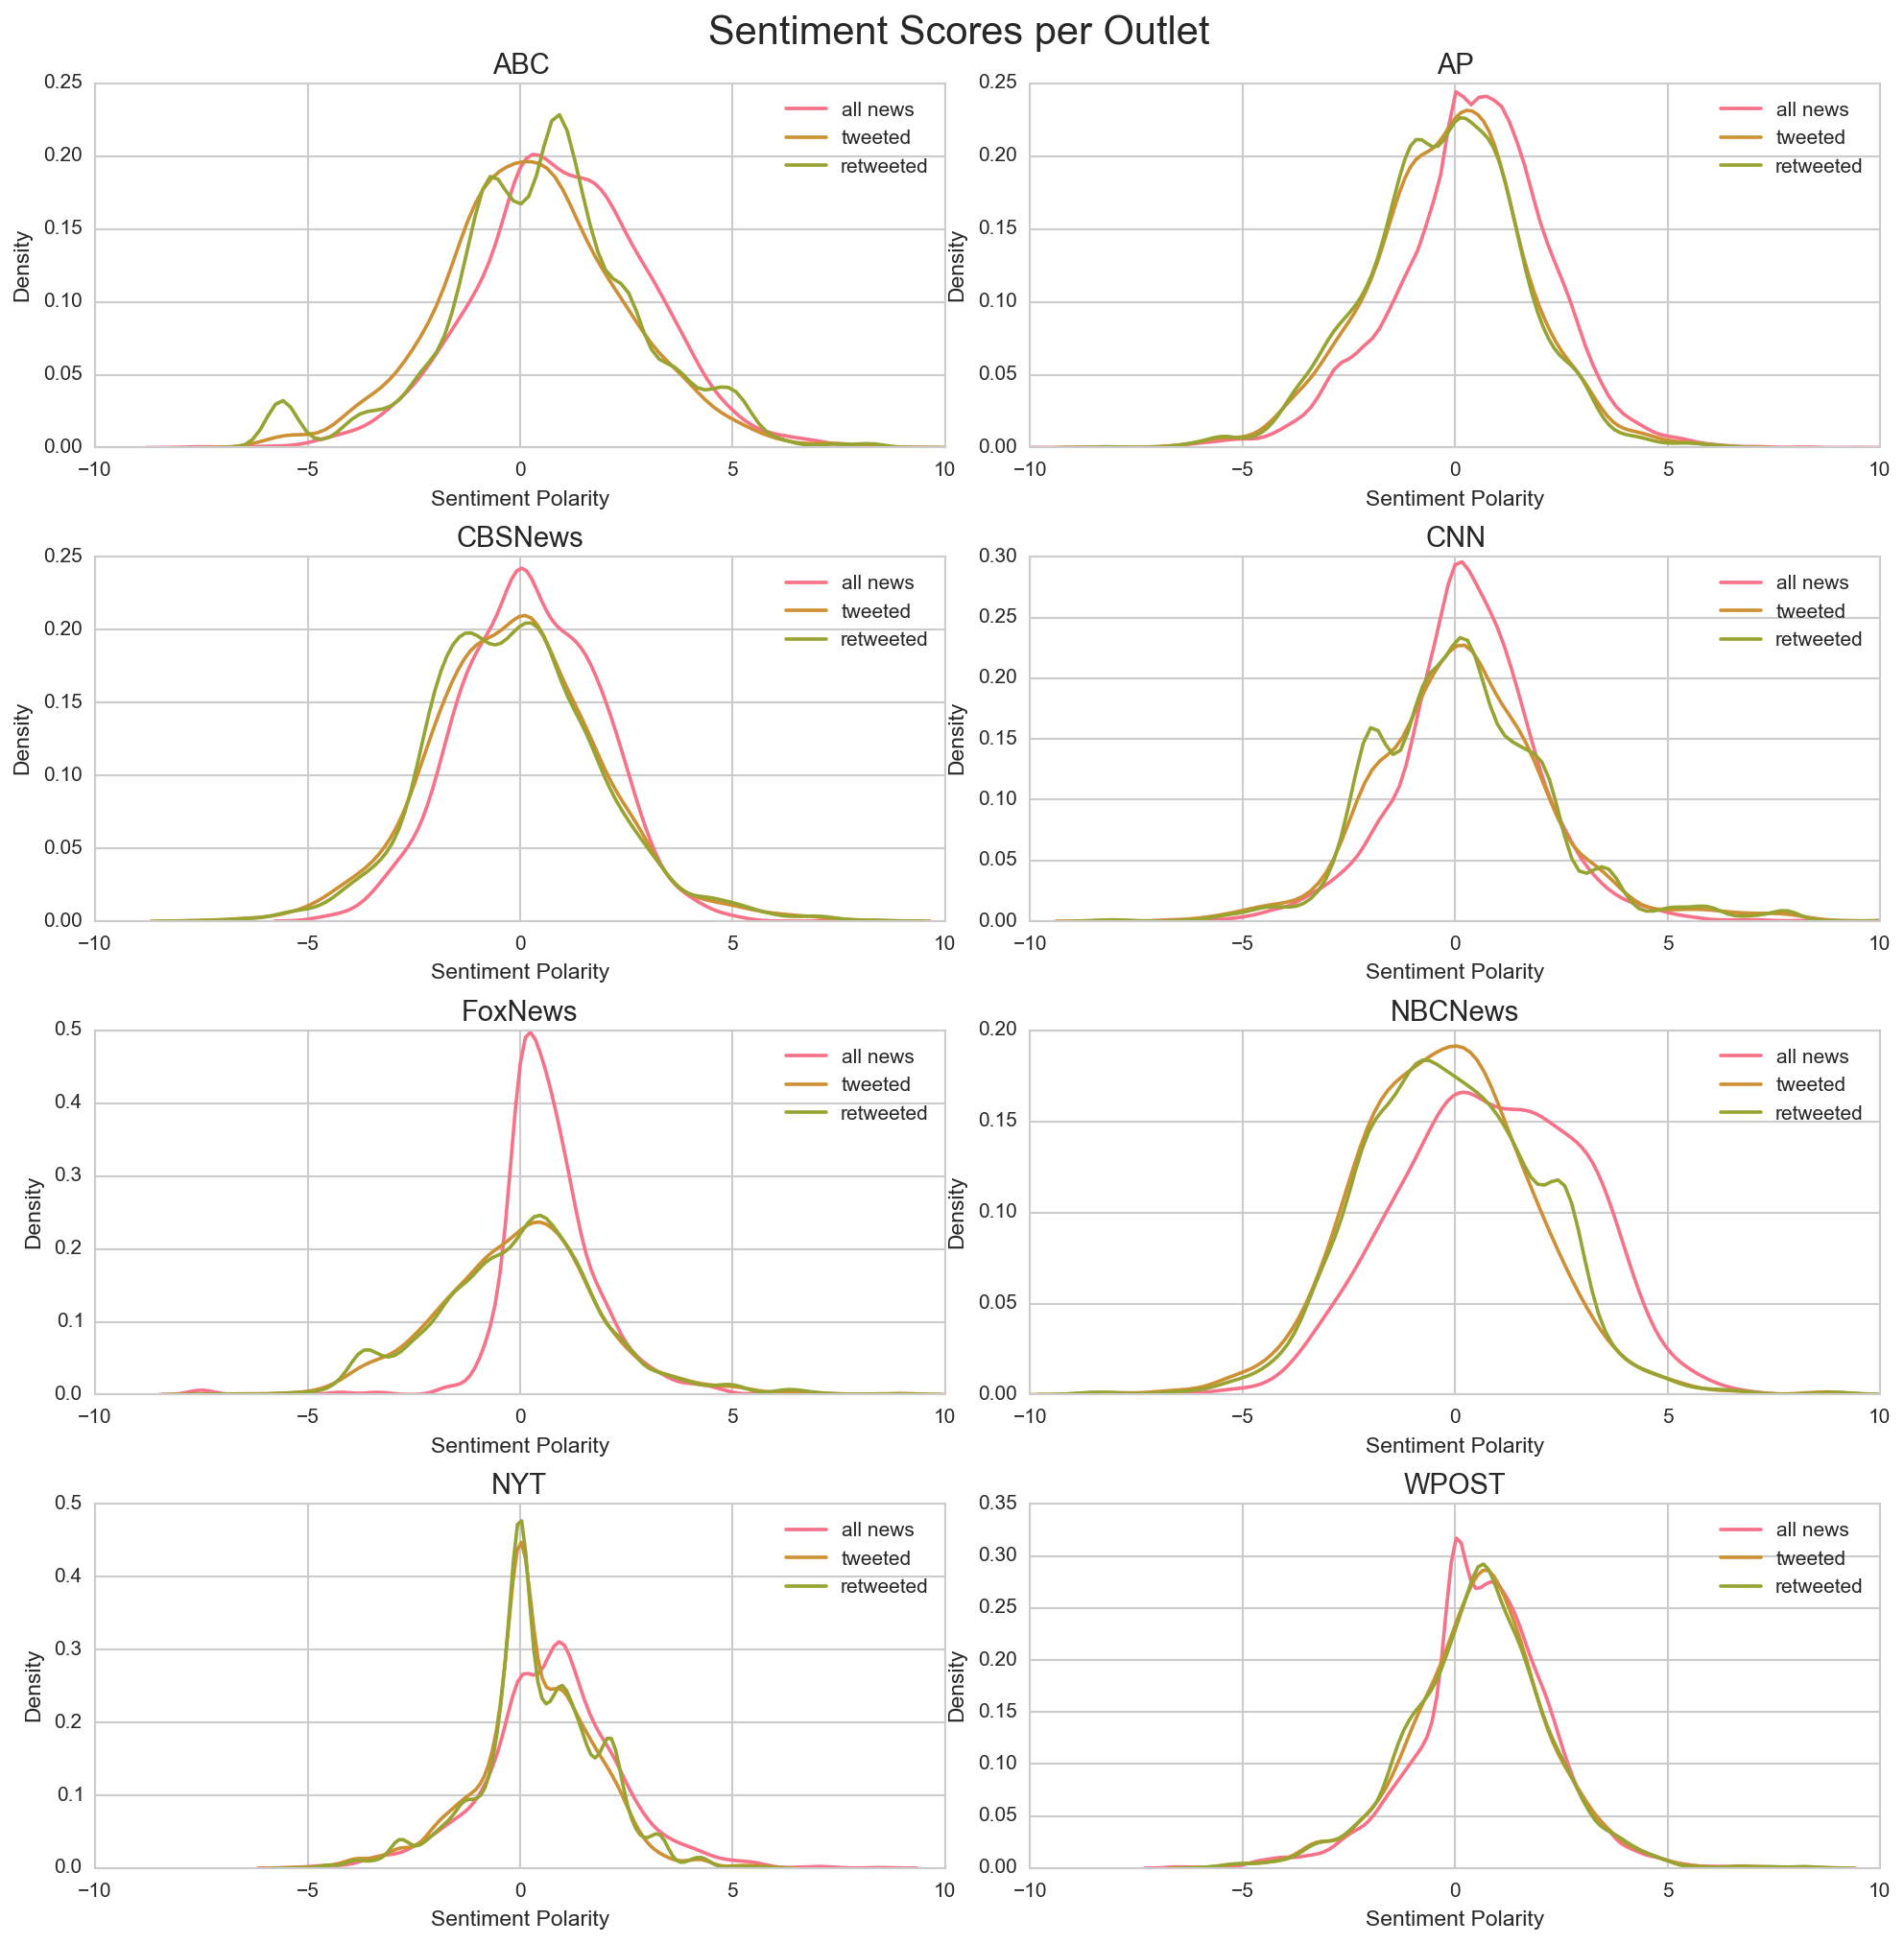

In [15]:
# Each outlet in a separate plot
f,axes = plt.subplots(nrows=4,ncols=2,figsize=(16,16),subplot_kw={'xlim': (-10,10)});#,sharex=True,sharey=True
#f.tight_layout(h_pad=4,rect=(0,0,1,0.97))
plt.subplots_adjust(hspace=0.3,wspace=0.1)
for i,o in enumerate(outlets):
    ax = axes[i/2][i%2]
    ax.set_title(o,fontsize=14)
    ax.set_xlabel('Sentiment Polarity')
    ax.set_ylabel('Density')
    sns.kdeplot(pn[pn['outlet']==o]['sp'],label='all news',ax=ax)
    sns.kdeplot(tn[tn['outlet']==o]['sp'],label='tweeted',ax=ax)
    sns.kdeplot(rn[rn['outlet']==o]['sp'],label='retweeted',ax=ax)
f.suptitle('Sentiment Scores per Outlet', fontsize=20,y=0.93)
plt.savefig('figs/sentiment-per-outlet.png',bbox_inches='tight')

In [16]:
df = pd.pivot_table(pn,index=['outlet'],values=['sp'],aggfunc=np.mean).rename(columns={'sp':'Published'})
df = df.join(pd.pivot_table(tn,index=['outlet'],values=['sp'],aggfunc=np.mean).rename(columns={'sp':'Tweeted'}))
df = df.join(pd.pivot_table(rn,index=['outlet'],values=['sp'],aggfunc=np.mean).rename(columns={'sp':'Retweeted'}))
df

,Published,Tweeted,Retweeted
outlet,,,
ABC,0.997326,0.347335,0.568554
AP,0.409545,-0.178651,-0.265285
CBSNews,0.247449,-0.109504,-0.132829
CNN,0.321695,0.224725,0.173701
FoxNews,0.712249,-0.007499,-0.004798
NBCNews,0.860164,-0.264770,-0.093226
NYT,0.756503,0.357766,0.430961
WPOST,0.653282,0.570105,0.542642


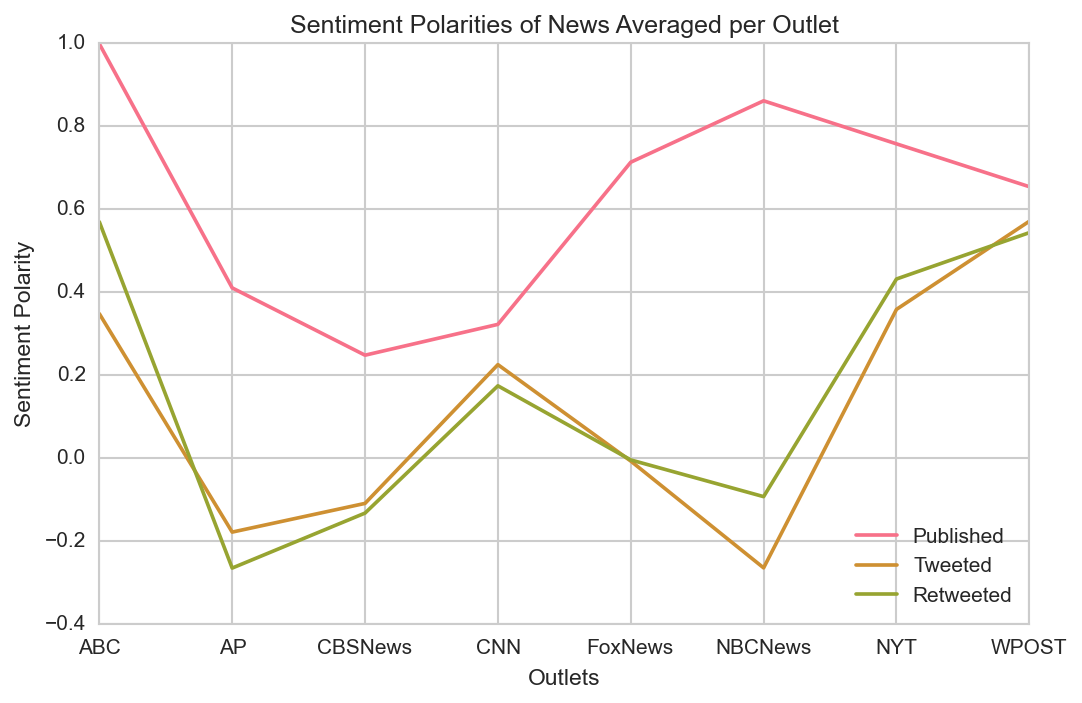

In [17]:
ax = df.plot()
ax.set_title('Sentiment Polarities of News Averaged per Outlet')
ax.set_ylabel('Sentiment Polarity')
ax.set_xlabel('Outlets')
plt.savefig('figs/sentiment-averages-per-outlet.png',bbox_inches='tight')

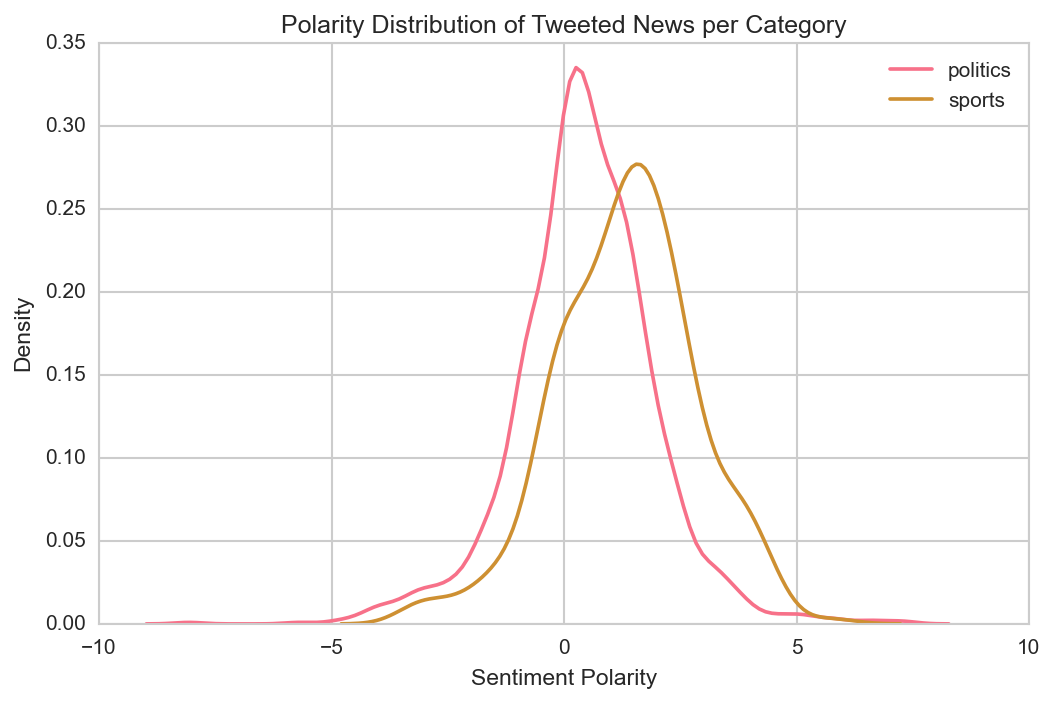

In [18]:
cs = ['politics','sports']#,'world'
ax = [sns.kdeplot(tn[tn['cat']==c]['sp'],label=c) for c in cs][0]
ax.set_title('Polarity Distribution of Tweeted News per Category')
ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Density')
fname= '-'.join(cs)
plt.savefig('figs/tweeted-'+fname+'.png',bbox_inches='tight')

In [19]:
outlets.remove('AP')
outlets.remove('CBSNews')

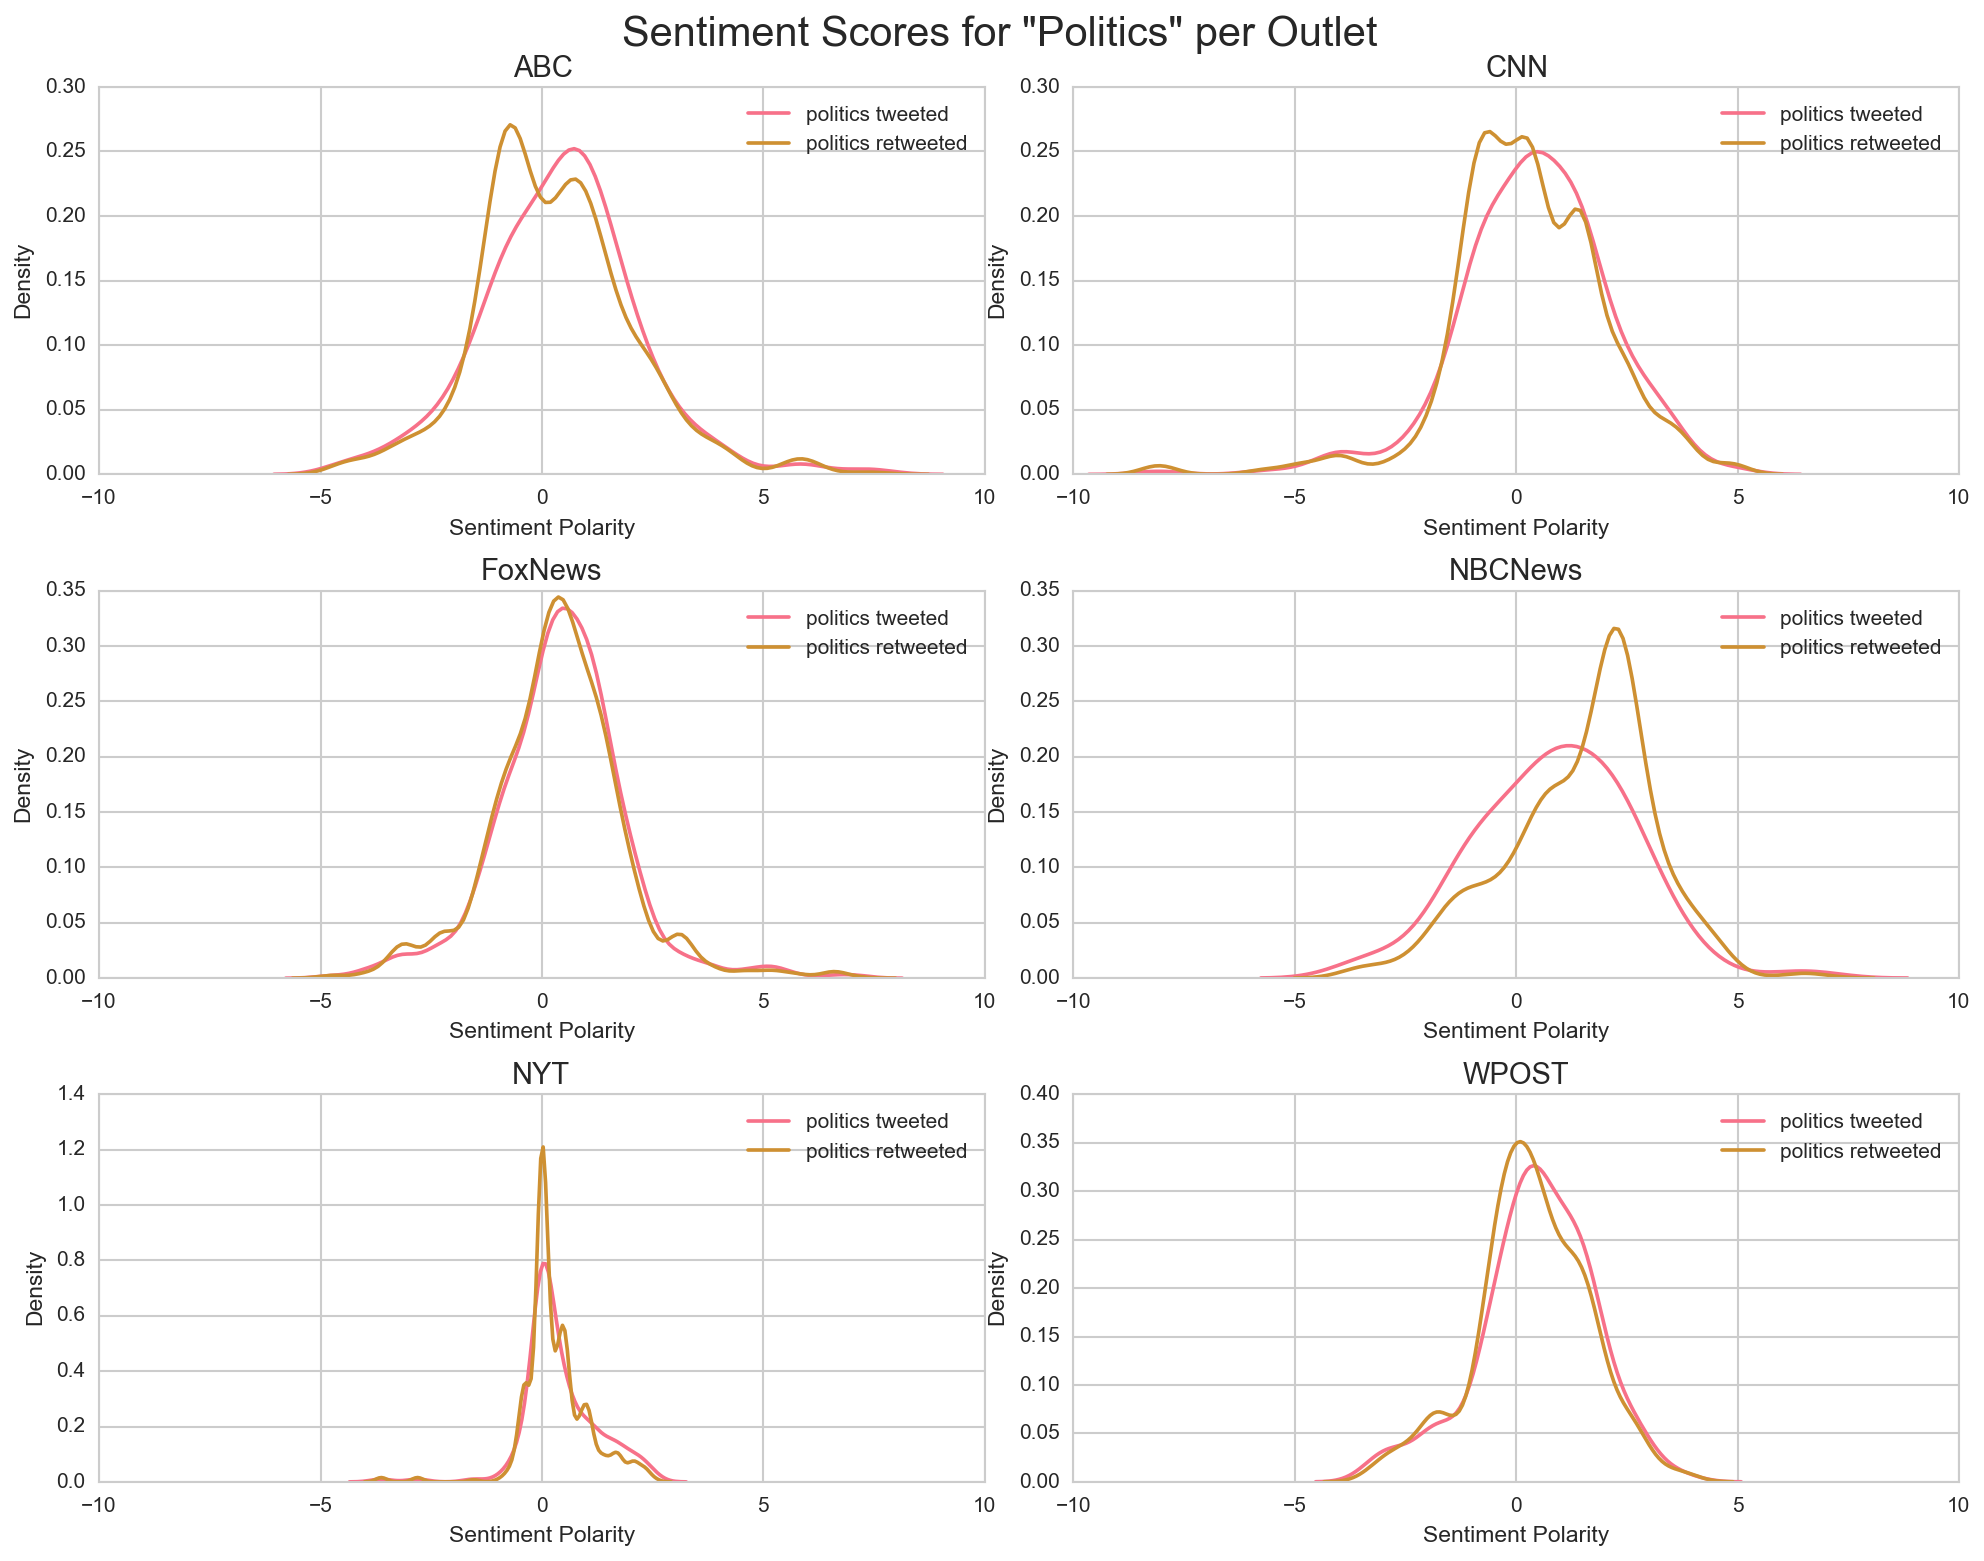

In [20]:
splim=(-10, 10)
sns.mpl.rc("figure", figsize=(10,4))
c='politics'
f,axes = plt.subplots(nrows=3,ncols=2,figsize=(16,12),subplot_kw={'xlim': splim});#,sharex=True,sharey=True
plt.subplots_adjust(hspace=0.3,wspace=0.1)
for i,o in enumerate(outlets):
    ax = axes[i/2][i%2]
    ax.set_title(o,fontsize=14)
    ax.set_xlabel('Sentiment Polarity')
    ax.set_ylabel('Density')
    tw = tn[(tn['cat']==c) & (tn['outlet']==o)]['sp']
    rt = rn[(rn['cat']==c) & (rn['outlet']==o)]['sp']
    sns.kdeplot(tw,label=c+' tweeted',ax=ax)
    sns.kdeplot(rt,label=c+' retweeted',ax=ax)
f.suptitle('Sentiment Scores for "Politics" per Outlet', fontsize=20,y=0.94)
plt.savefig('figs/politics-per-outlet.png',bbox_inches='tight')

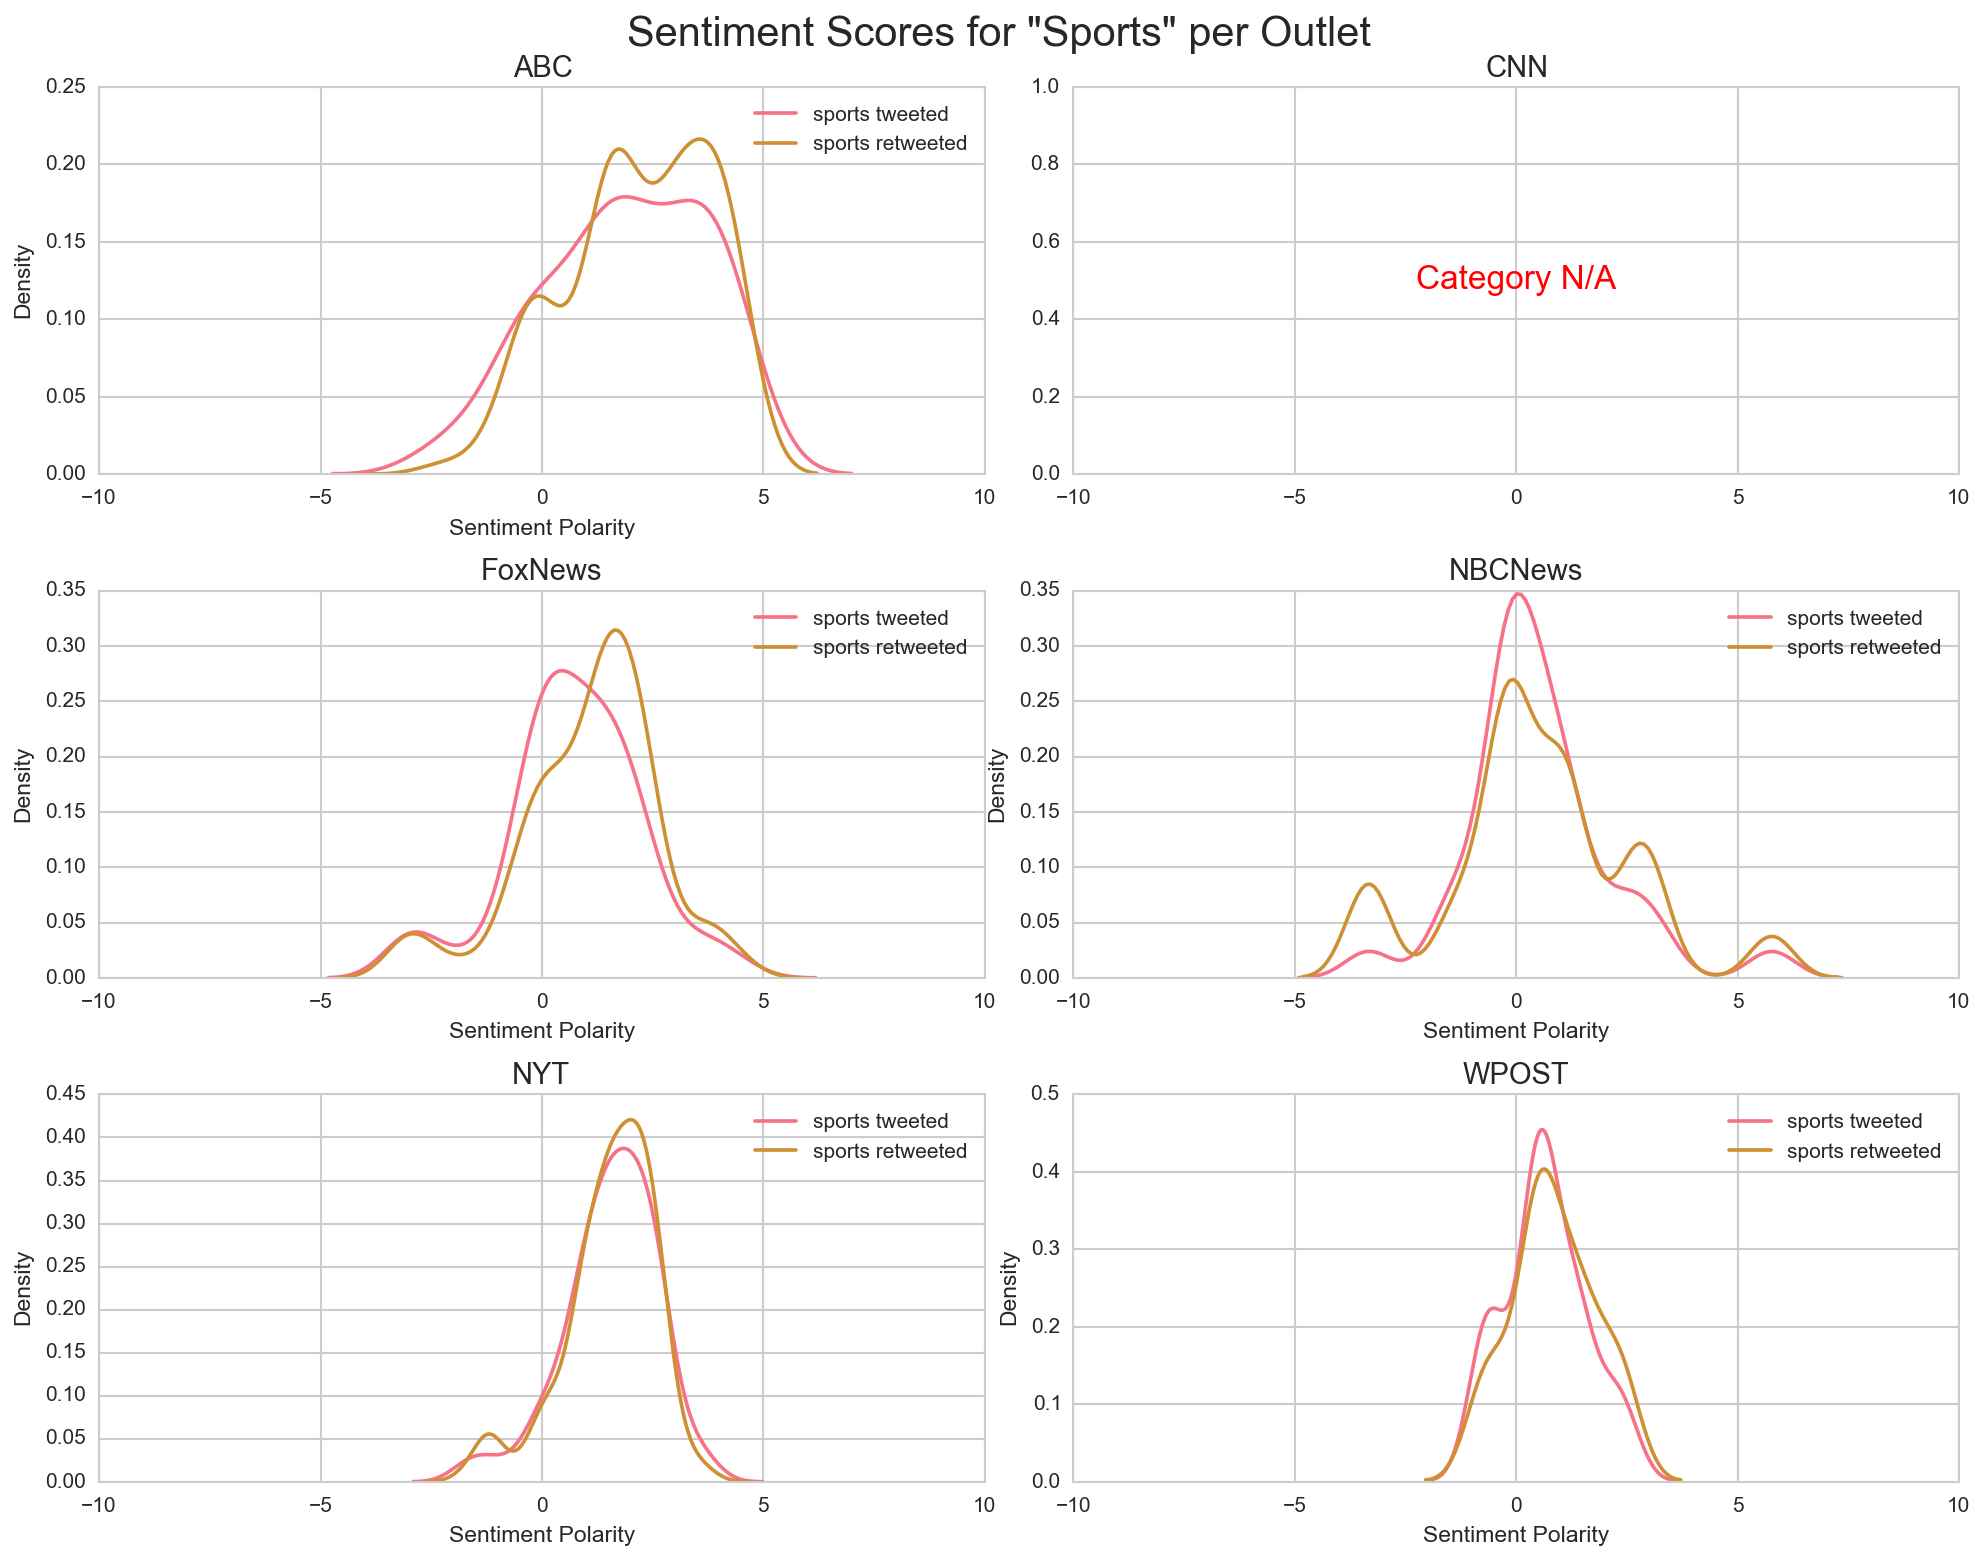

In [21]:
splim=(-10, 10)
sns.mpl.rc("figure", figsize=(10,4))
c='sports'
f,axes = plt.subplots(nrows=3,ncols=2,figsize=(16,12),subplot_kw={'xlim': splim});#,sharex=True,sharey=True
plt.subplots_adjust(hspace=0.3,wspace=0.1)
for i,o in enumerate(outlets):
    ax = axes[i/2][i%2]
    ax.set_title(o,fontsize=14)
    if o == 'CNN':
        ax.text(0.5, 0.5, 'Category N/A',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=16, color='red',
        transform=ax.transAxes)
        continue
    ax.set_xlabel('Sentiment Polarity')
    ax.set_ylabel('Density')
    tw = tn[(tn['cat']==c) & (tn['outlet']==o)]['sp']
    rt = rn[(rn['cat']==c) & (rn['outlet']==o)]['sp']
    sns.kdeplot(tw,label=c+' tweeted',ax=ax)
    sns.kdeplot(rt,label=c+' retweeted',ax=ax)
f.suptitle('Sentiment Scores for "Sports" per Outlet', fontsize=20,y=0.94)
plt.savefig('figs/sports-per-outlet.png',bbox_inches='tight')

In [22]:
c = 'politics'
df = pd.pivot_table(tn[tn['cat']==c],index=['outlet'],values=['sp'],aggfunc=np.mean).rename(columns={'sp':'Tweeted'})
df = df.join(pd.pivot_table(rn[rn['cat']==c],index=['outlet'],values=['sp'],aggfunc=np.mean).rename(columns={'sp':'Retweeted'}))
df

,Tweeted,Retweeted
outlet,,
ABC,0.427611,0.289167
CNN,0.399042,0.256381
FoxNews,0.435667,0.366697
NBCNews,0.863457,1.445029
NYT,0.414118,0.316609
WPOST,0.459786,0.351538


In [23]:
c = 'sports'
df = pd.pivot_table(tn[tn['cat']==c],index=['outlet'],values=['sp'],aggfunc=np.mean).rename(columns={'sp':'Tweeted'})
df = df.join(pd.pivot_table(rn[rn['cat']==c],index=['outlet'],values=['sp'],aggfunc=np.mean).rename(columns={'sp':'Retweeted'}))
df

,Tweeted,Retweeted
outlet,,
ABC,1.908525,2.193559
CNN,2.652000,2.555312
FoxNews,0.740492,1.086916
NBCNews,0.516452,0.525119
NYT,1.554690,1.531263
WPOST,0.653333,0.846667


In [24]:
#Any correlation between polarity of the tweet text and retweeting?
tn[['rt','sp','sp_t']].corr()

,rt,sp,sp_t
rt,1.000000,0.024777,0.017971
sp,0.024777,1.000000,0.424538
sp_t,0.017971,0.424538,1.000000
